<a id = "head"></a>

# Принятие решений в бизнесе на основе данных
---


### Описание проекта

В нашем распоряжении имеется список гипотез для увеличения выручки, составленный совместно с отделом маркетинга. Необходимо приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты. 

---

### Описание данных
Имеется несколько файлов с данными:

Датасет с гипотезами:

- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. (Чем больше значение Efforts, тем дороже проверка гипотезы.)

Набор данных с заказами покупателей:

- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

Данные о количестве посещений в определенную дату:

- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста.

### *План выполнения проекта:*
***

1. [Часть 1. Приоритизация гипотез:](#Step1)
    
    - 1.1 Использование фреймворка ICE;
    - 1.2 Использование фреймворка RICE.

2. [Часть 2. Анализ A/B-теста:](#Step2)
   - [2.1 Проведение анализа A/B-теста;](#Step2.1)
   - [2.2 Вывод по второй части.](#Step2.2)

3. [Общий вывод по проекту.](#Step3)

In [1]:
# Импорт библиотек:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

<a id = "Step1"></a>

## Часть 1. Приоритизация гипотез:

---

### 1.1 Использование фреймворка ICE.

- [Начало](#head)
- [Часть 2, вопросы 1-4](#Step2.1-4)
- [Часть 2, вопросы 5-8](#Step2.5-8)
- [Часть 2, вопросы 9-11](#Step2.9-11)
- [Часть 2, вопросы 12-14](#Step2.12-14)
- [3.Вывод](#Step3)

In [2]:
hypothesis = pd.read_csv(r'C:\Users\vladi\Downloads\data_for_analysis\hypothesis.csv')

In [3]:
pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 150
hypothesis.columns = ['hypothesis', 'reach', 'impact', 'confidence', 'efforts']
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


---
*В представленной таблице содержатся 9 гипотез и оценки параметров для расчета приоритетности задач способами ICE и RICE.*

In [4]:
hypothesis['ICE'] = (hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
hypothesis[['hypothesis', 'ICE']].sort_values(by = 'ICE', ascending = False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


---
**Наиболее перспективные гипотезы по ICE:**
1. Запустить акцию, дающую скидку на товар в день рождения
2. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
3. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
4. Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию

<a id = "Step1.2"></a>

### 1.2 Использование фреймворка RICE:

In [5]:
hypothesis['RICE'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) /\
hypothesis['efforts']
hypothesis[['hypothesis', 'RICE']].sort_values(by = 'RICE', ascending = False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


---
**Наиболее перспективные гипотезы по RICE:**

1. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
2. Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
3. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
4. Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию

---
Как мы видим, при использовании различных методов приоритизации, топ перспективных гипотез меняется. Так гипотеза "Запустить акцию, дающую скидку на товар в день рождения" - самая перспективная по методу ICE, оказалась лишь на пятой строчке по приоритету, при использовании метода RICE. А все из-за того, что у этой гипотезы очень низкий охват пользователей. За счет большого охвата и низкой стоимости тестирования гипотеза "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа" стала второй в приоритете по методу RICE. 

Следующие гипотезы попали в список самых перспективных как по ICE так и по RICE:
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
- Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию


<a id = "Step2"></a>

## Часть 2. Анализ A/B-теста

- [Начало](#head)
- [Часть 1](#Step1)
- [Часть 2, вопросы 1-4](#Step2.1-4)
- [Часть 2, вопросы 5-8](#Step2.5-8)
- [Часть 2, вопросы 9-11](#Step2.9-11)
- [Часть 2, вопросы 12-14](#Step2.12-14)
- [3.Вывод](#Step3)

Прежде чем приступить к анализу, посмотрим на предоставленные данные.

In [6]:
orders = pd.read_csv(r'C:\Users\vladi\Downloads\data_for_analysis\orders.csv')
visitors = pd.read_csv(r'C:\Users\vladi\Downloads\data_for_analysis\visitors.csv')

In [7]:
orders.sample(5)

,transactionId,visitorId,date,revenue,group
665,452710654,3072399624,2019-08-29,10850,A
333,968111463,458253749,2019-08-25,790,B
246,437656952,199603092,2019-08-02,3488,B
1174,2927992070,1658204305,2019-08-14,1290,A
296,143829018,3054940424,2019-08-25,490,B


In [8]:
orders.columns = ['transactionid', 'visitorid', 'date', 'revenue', 'group']

In [9]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionid  1197 non-null   int64 
 1   visitorid      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [10]:
orders.duplicated().sum()

0

In [11]:
visitors.sample(5)

,date,group,visitors
28,2019-08-29,A,577
56,2019-08-26,B,676
61,2019-08-31,B,718
44,2019-08-14,B,746
24,2019-08-25,A,621


In [12]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [13]:
visitors.duplicated().sum()

0

---
Дубликаты и пропуски отсутсвуют. Необходимо поменять тип данных в столбцах даты.

In [14]:
orders['date'] = pd.to_datetime(orders['date'])

In [15]:
visitors['date'] = pd.to_datetime(visitors['date'])

Теперь данные готовы для дальнейшей работы. 

In [16]:
print("Длина экперимента с ", orders['date'].dt.strftime('%Y-%m-%d').min(), 
      "по", orders['date'].dt.strftime('%Y-%m-%d').max())

Длина экперимента с  2019-08-01 по 2019-08-31


Данные собраны за август 2018 года.

<a id = Step2.1-4> </a>

##### 1) Построим график кумулятивной выручки по группам:

- [Начало](#head)
- [Часть 1](#Step1)
- [Часть 2, вопросы 5-8](#Step2.5-8)
- [Часть 2, вопросы 9-11](#Step2.9-11)
- [Часть 2, вопросы 12-14](#Step2.12-14)
- [3.Вывод](#Step3)

In [17]:
# Создадим массив уникальных пар значений дат и групп:
dates_groups = orders[['date', 'group']].drop_duplicates()

In [18]:
# Агрегируем значения таблицы orders:
orders_aggregated = dates_groups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], 
                                                     orders['group'] == x['group'])]\
                     .agg({'date' : 'max', 
                           'group' : 'max', 
                           'transactionid' : pd.Series.nunique, 
                           'visitorid' : pd.Series.nunique, 
                           'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
#orders_aggregated

In [19]:
# Агрегируем значения таблицы visitors:
visitors_aggregated = dates_groups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], 
                                                                           visitors['group'] == x['group'])]\
                                         .agg({'date' : 'max', 
                                               'group' : 'max', 
                                               'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])
#visitors_aggregated

In [20]:
# Объединим кумулятивные данные в одной таблице и присвоим ее столбцам понятные названия:
cumulative_data = orders_aggregated.merge(visitors_aggregated, 
                                          left_on=['date', 'group'], 
                                          right_on=['date', 'group'])
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulative_data.head(6)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845
5,2019-08-03,B,61,59,380996,1803


In [21]:
# Подготовим таблицы с кумулятивным объемом выручки и кумулятивным количеством заказов по дням в группах А и В:
cumulative_revenueA = cumulative_data[cumulative_data['group'] == 'A'][['date','revenue','orders']]
cumulative_revenueB = cumulative_data[cumulative_data['group'] == 'B'][['date','revenue','orders']]

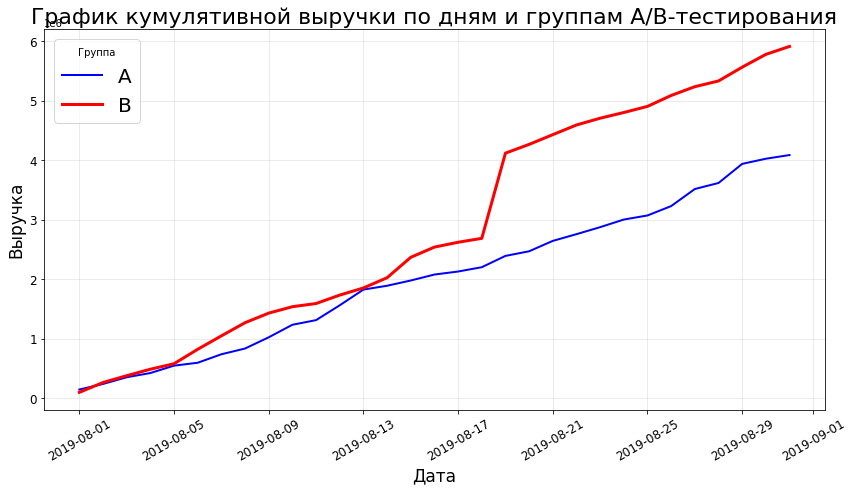

In [22]:
import warnings
warnings.filterwarnings("ignore")

# Построим график выручки для групп А и В:
fig, ax = plt.subplots(figsize=(14,7))

line1 = ax.plot(cumulative_revenueA['date'], 
                cumulative_revenueA['revenue'], 
                label = 'A', c = 'blue', lw = 2)

line2 = ax.plot(cumulative_revenueB['date'], 
                 cumulative_revenueB['revenue'], 
                 label = 'B', c = 'red', lw = 3)

plt.legend(loc='best', title = 'Группа', fontsize = 20)
plt.grid(axis='both', alpha=.3)
plt.title("График кумулятивной выручки по дням и группам A/B-тестирования", fontsize=22)
plt.ylabel("Выручка", fontsize = 17)
plt.xlabel("Дата", fontsize = 17)
plt.xticks(fontsize=12, rotation=30)
plt.yticks(fontsize=12)

plt.show()

---
Выручка группы А увеличивается плавно, без резких скачков. В группе В произошел резкий рост выручки 
19 августа. Это может говорить о всплеске числа заказов или о появлении более дорогих заказов. 

***2) Построим график кумулятивного среднего чека по группам:***

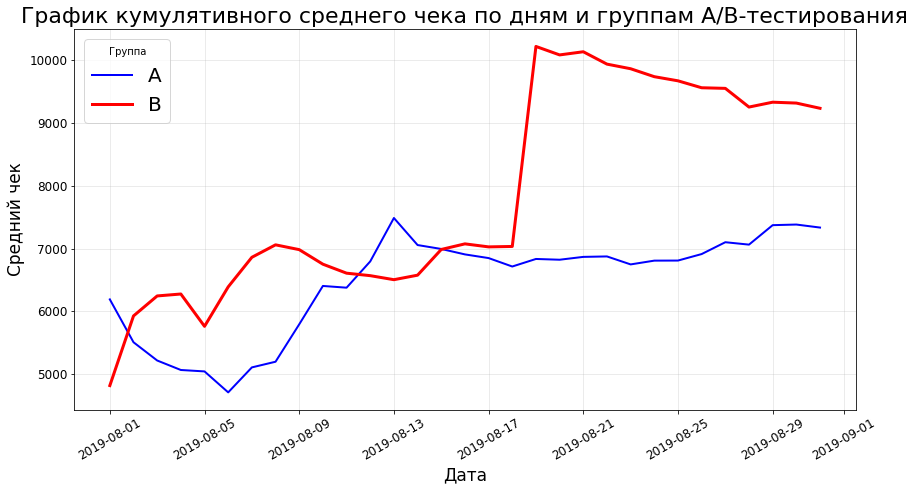

In [23]:
fig, ax = plt.subplots(figsize=(14,7))

line1 = ax.plot(cumulative_revenueA['date'], 
                cumulative_revenueA['revenue'] / cumulative_revenueA['orders'], 
                label = 'A', c = 'blue', lw = 2)

line2 = ax.plot(cumulative_revenueB['date'], 
                 cumulative_revenueB['revenue'] / cumulative_revenueB['orders'], 
                 label = 'B', c = 'red', lw = 3)

plt.legend(loc='best', title = 'Группа', fontsize = 20)
plt.grid(axis='both', alpha=.3)
plt.title("График кумулятивного среднего чека по дням и группам A/B-тестирования", fontsize=22)
plt.ylabel("Средний чек", fontsize = 17)
plt.xlabel("Дата", fontsize = 17)
plt.xticks(fontsize=12, rotation=30)
plt.yticks(fontsize=12)

plt.show()

---
Средний чек становится более или менее равномерным во второй половине теста. Причем для группы A его размер держится приблизительно на одном уровне. Для группы В размер среднего чека, достигнув пика, постепенно снижается. В конце теста разрыв между средним чеком группы А и группы В составляет около 2000. На протяжении всего теста средний чек группы А превышал средний чек группы В лишь дважды. Как и на предыдущем графике, мы наблюдаем 19 августа резкий скачок показателя в группе В. 

***3) Построим график относительного изменения кумулятивного среднего чека группы B к группе A:***

In [24]:
# Объединим данные в одном датафрейме:
merged_сumulative_revenue = cumulative_revenueA.merge(cumulative_revenueB, 
                                                      left_on='date', 
                                                      right_on='date', 
                                                      how='left', 
                                                      suffixes=['A', 'B'])
#merged_сumulative_revenue.head(10)

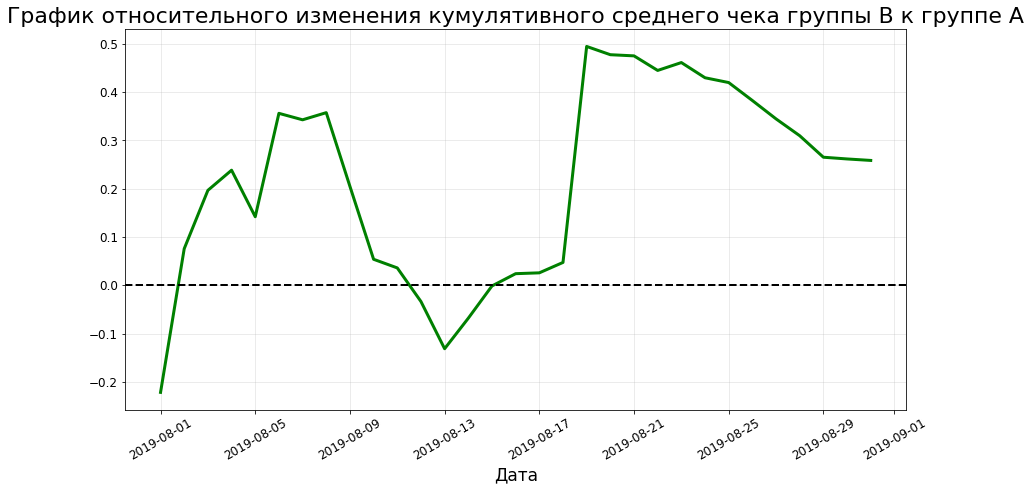

In [25]:
# Поcтроим отношение средних чеков:
fig, ax = plt.subplots(figsize=(14,7))

line1 = ax.plot(merged_сumulative_revenue['date'], 
                (merged_сumulative_revenue['revenueB'] / merged_сumulative_revenue['ordersB'])/
                (merged_сumulative_revenue['revenueA'] / merged_сumulative_revenue['ordersA']) - 1,
                c = 'green', lw = 3)

plt.axhline(y=0, linewidth=2, ls = '--', color='black')
plt.grid(axis='both', alpha=.3)
plt.title("График относительного изменения кумулятивного среднего чека группы B к группе A", fontsize=22)
plt.xlabel("Дата", fontsize = 17)
plt.xticks(fontsize=12, rotation=30)
plt.yticks(fontsize=12)

plt.show()

---
Большую часть наблюдений размер среднего чека группы В превосходил средний чек группы А. Возможно в данных  присутствуют выбросы, так как в некоторых точках график резко меняет свое направление.

***4) Построим график кумулятивной конверсии по группам:***

In [26]:
# Для начала рассчитаем кумулятивную конверсию и разделим данные по группам:
cumulative_data['conversion'] = cumulative_data['orders'] / cumulative_data['visitors']

cumulative_dataA = cumulative_data[cumulative_data['group'] == 'A']
cumulative_dataB = cumulative_data[cumulative_data['group'] == 'B']

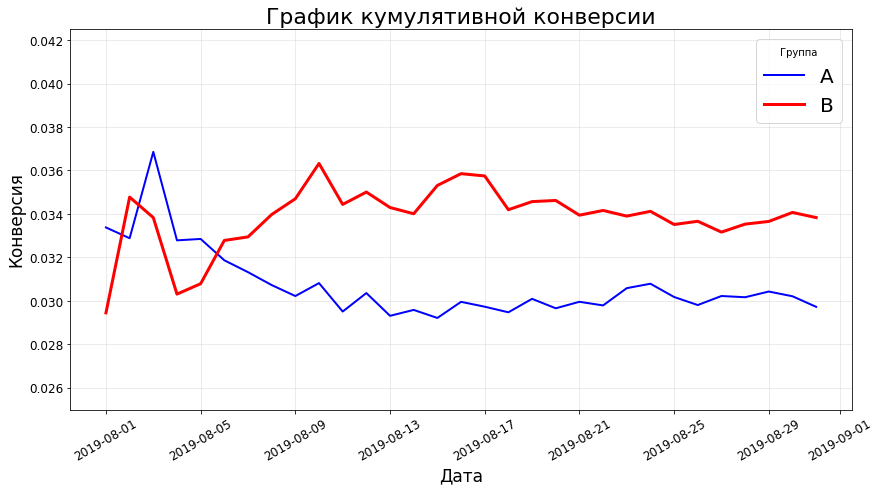

In [27]:
# Построим график:
fig, ax = plt.subplots(figsize=(14,7))

line1 = ax.plot(cumulative_dataA['date'], 
                cumulative_dataA['conversion'], 
                label = 'A', c = 'blue', lw = 2)

line2 = ax.plot(cumulative_dataB['date'], 
                cumulative_dataB['conversion'], 
                 label = 'B', c = 'red', lw = 3)

plt.legend(loc='best', title = 'Группа', fontsize = 20)
plt.grid(axis='both', alpha=.3)
plt.title("График кумулятивной конверсии", fontsize=22)
plt.ylabel("Конверсия", fontsize = 17)
plt.xlabel("Дата", fontsize = 17)
plt.xticks(fontsize=12, rotation=30)
plt.yticks(fontsize=12)
plt.ylim(0.025, 0.0425)
plt.show()

---
Изначально конверсии в обоих группах менялись в одном направлении. Затем конверсия группы В вышла вперед и установилась на одном уровне. Конверсия группы А также зафиксировалась на одном уровне, но на несколько процентов ниже. Это расхождение произошло через несколько дней после начала наблюдений. Возможно изменения, которым подверглась группа В в рамках исследования, имели отложенный эффект.

<a id = Step2.5-8> </a>

***5) Постороим график относительного изменения кумулятивной конверсии группы B к группе A:***

- [Начало](#head)
- [Часть 1](#Step1)
- [Часть 2, вопросы 1-4](#Step2.1-4)
- [Часть 2, вопросы 9-11](#Step2.9-11)
- [Часть 2, вопросы 12-14](#Step2.12-14)
- [3.Вывод](#Step3)

In [28]:
# Соединим таблицы с конверсиями двух групп:
merged_cumulative_conversions = cumulative_dataA[['date','conversion']]\
.merge(cumulative_dataB[['date','conversion']], 
       left_on='date', 
       right_on='date', 
       how='left', 
       suffixes=['A', 'B'])
#merged_cumulative_conversions.head(6)

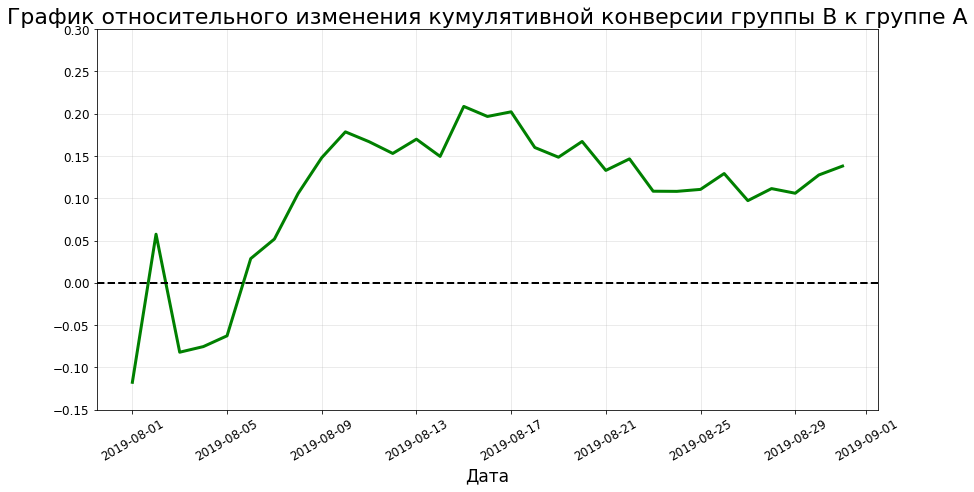

In [29]:
# Построим график:
fig, ax = plt.subplots(figsize=(14,7))

line1 = ax.plot(merged_cumulative_conversions['date'], 
                merged_cumulative_conversions['conversionB'] / merged_cumulative_conversions['conversionA'] - 1,
                c = 'green', lw = 3)

plt.axhline(y=0, linewidth=2, ls = '--', color='black')
plt.grid(axis='both', alpha=.3)
plt.title("График относительного изменения кумулятивной конверсии группы B к группе A", fontsize=22)
plt.xlabel("Дата", fontsize = 17)
plt.xticks(fontsize=12, rotation=30)
plt.yticks(fontsize=12)
plt.ylim(-0.15, 0.3)
plt.show()

---
Большую часть наблюдений конвесия в группе В превосходила конверсию в группе А. Только в начале теста всего несколько дней конверсия группы А была лучше. 

***6) Построим точечный график количества заказов по пользователям:***

In [30]:
# Подготвим таблицу с количеством заказов каждого пользователя:
orders_by_users = orders.groupby('visitorid', as_index=False).agg({'transactionid': pd.Series.nunique})
orders_by_users.columns = ['userid', 'orders']
orders_by_users.sort_values(by = 'orders', ascending = False).head(10)

,userid,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


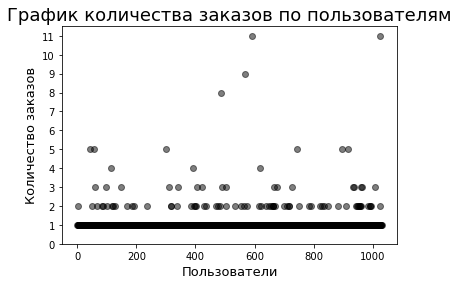

In [31]:
# Построим точечную диаграмму числа заказов на одного пользователя: 
x_values = pd.Series(range(0,len(orders_by_users)))
plt.scatter(x_values, orders_by_users['orders'], c = 'black', alpha = 0.5)
ytick_location = range(0,12,1)
plt.yticks(ticks=ytick_location)
plt.title("График количества заказов по пользователям", fontsize=18)
plt.xlabel("Пользователи", fontsize = 13)
plt.ylabel("Количество заказов", fontsize = 13)
plt.show()

---
Большинство покупателей заказывали только один раз. Число пользователей с 2-5 заказами тоже значительно, но пока непонятно какую долю они составляют. 

***7) Рассчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей:***

In [32]:
np.percentile(orders_by_users['orders'], [95, 99])

array([2., 4.])

---
Не более 5% пользователей оформляли больше чем 2 заказа. 1% пользователей заказывали более четырех раз.
Выберем 3 заказа на одного пользователя верхней границей числа заказов. Всех остальных пользователей отсеим как аномальных.

***8) Построим точечный график стоимостей заказов:***

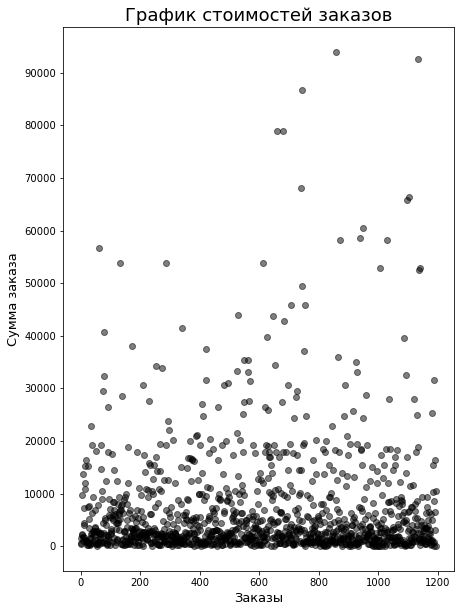

In [33]:
fig, ax = plt.subplots(figsize=(7,10))

x_values = pd.Series(range(0,len(orders[orders['revenue'] < 200000])))
line1 = ax.scatter(x_values, orders[orders['revenue'] < 200000]['revenue'], c = 'black', alpha = 0.5)

ytick_location = range(0,100000,10000)
plt.yticks(ticks=ytick_location)
plt.title("График стоимостей заказов", fontsize=18)
plt.xlabel("Заказы", fontsize = 13)
plt.ylabel("Сумма заказа", fontsize = 13)
plt.show()

---
Из-за наличия в данных больших заказов, чтобы увидеть картину более детально, пришлось ограничить максимальную сумму заказа. 

На графике видим, что основная масса заказов сосредоточена в диапазоне до 20000. 

<a id = Step2.9-11> </a>
***9) Рассчитаем 95-й и 99-й перцентили стоимости заказов и выберем границу для определения аномальных заказов:***



- [Начало](#head)
- [Часть 1](#Step1)
- [Часть 2, вопросы 1-4](#Step2.1-4)
- [Часть 2, вопросы 5-8](#Step2.5-8)
- [Часть 2, вопросы 12-14](#Step2.12-14)
- [3.Вывод](#Step3)

In [34]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

---
Не более 5% заказов дороже 28000 рублей и не более 1% дороже 58233,2 рублей. Определим границей аномальных заказов  покупки на сумму свыше 40000 рублей. 

***10) Рассчитаем статистическую значимость различий в конверсии между группами по «сырым» данным:***

In [35]:
# Сформируем таблицу посещений и кумулятивную таблицу посещений для группы А:
visitors_dailyA = visitors[visitors['group']=='A'][['date', 'visitors']]
visitors_dailyA.columns = ['date', 'visitors_per_dateA']

visitors_cummulativeA = visitors_dailyA.apply(lambda x: 
                                              visitors_dailyA[visitors_dailyA['date'] <= x['date']] \
                                              .agg({'date' : 'max', 'visitors_per_dateA' : 'sum'}), 
                                              axis=1)
visitors_cummulativeA.columns = ['date', 'visitors_cummulativeA']

In [36]:
# Сформируем таблицу посещений и кумулятивную таблицу посещений для группы В:
visitors_dailyB = visitors[visitors['group']=='B'][['date', 'visitors']]
visitors_dailyB.columns = ['date', 'visitors_per_dateB']

visitors_cummulativeB = visitors_dailyB.apply(lambda x: 
                                              visitors_dailyB[visitors_dailyB['date'] <= x['date']] \
                                              .agg({'date' : 'max', 'visitors_per_dateB' : 'sum'}), 
                                              axis=1)
visitors_cummulativeB.columns = ['date', 'visitors_cummulativeB']

In [37]:
# Сформируем таблицу заказов и кумулятивную таблицу заказов для группы А:
orders_dailyA = orders[orders['group']=='A'][['date', 'transactionid', 'visitorid', 'revenue']]\
    .groupby('date', as_index=False).agg({'transactionid' : pd.Series.nunique, 'revenue' : 'sum'})
orders_dailyA.columns = ['date', 'orders_per_dateA', 'revenue_per_dateA']

orders_cummulativeA = orders_dailyA.apply(lambda x: orders_dailyA[orders_dailyA['date'] <= x['date']]\
            .agg({'date' : 'max',
                  'orders_per_dateA' : 'sum',
                  'revenue_per_dateA' : 'sum'}), axis=1).sort_values(by=['date'])
orders_cummulativeA.columns = ['date', 'orders_cummulativeA', 'revenue_cummulativeA']

In [38]:
# Сформируем таблицу заказов и кумулятивную таблицу заказов для группы В:
orders_dailyB = orders[orders['group']=='B'][['date', 'transactionid', 'visitorid', 'revenue']]\
    .groupby('date', as_index=False).agg({'transactionid' : pd.Series.nunique, 'revenue' : 'sum'})
orders_dailyB.columns = ['date', 'orders_per_dateB', 'revenue_per_dateB']

orders_cummulativeB = orders_dailyB.apply(lambda x: orders_dailyB[orders_dailyB['date'] <= x['date']]\
            .agg({'date' : 'max',
                  'orders_per_dateB' : 'sum',
                  'revenue_per_dateB' : 'sum'}), axis=1).sort_values(by=['date'])
orders_cummulativeB.columns = ['date', 'orders_cummulativeB', 'revenue_cummulativeB']

In [39]:
# Объединим все сформированные таблицы в одну:
data = orders_dailyA.merge(orders_dailyB, left_on='date', right_on='date', how='left')\
    .merge(orders_cummulativeA, left_on='date', right_on='date', how='left')\
    .merge(orders_cummulativeB, left_on='date', right_on='date', how='left')\
    .merge(visitors_dailyA, left_on='date', right_on='date', how='left')\
    .merge(visitors_dailyB, left_on='date', right_on='date', how='left')\
    .merge(visitors_cummulativeA, left_on='date', right_on='date', how='left')\
    .merge(visitors_cummulativeB, left_on='date', right_on='date', how='left')
data.sample(10)

,date,orders_per_dateA,revenue_per_dateA,orders_per_dateB,revenue_per_dateB,orders_cummulativeA,revenue_cummulativeA,orders_cummulativeB,revenue_cummulativeB,visitors_per_dateA,visitors_per_dateB,visitors_cummulativeA,visitors_cummulativeB
24,2019-08-25,10,68634,14,102862,451,3070704,507,4901584,621,679,14943,15127
20,2019-08-21,23,174309,14,163077,385,2643838,437,4426892,646,656,12850,12874
28,2019-08-29,22,320690,20,231130,534,3936510,596,5559398,577,531,17547,17708
18,2019-08-19,22,189743,21,1429920,350,2391910,403,4116541,502,487,11629,11658
17,2019-08-18,17,72398,9,65831,328,2202167,382,2686621,668,737,11127,11171
19,2019-08-20,12,77619,20,147274,362,2469529,423,4263815,575,560,12204,12218
5,2019-08-06,18,48484,28,242342,127,598401,129,824337,667,655,3985,3935
10,2019-08-11,13,77585,13,53310,206,1313683,241,1592513,718,721,6980,6998
25,2019-08-26,16,157214,25,182999,467,3227918,532,5084583,722,676,15665,15803
12,2019-08-13,14,263638,21,119671,244,1826511,285,1853738,748,769,8323,8310


In [40]:
# Создадим переменные для пользователей обеих групп и укажем число совершённых заказов:

orders_by_usersA = orders[orders['group']=='A']\
    .groupby('visitorid', as_index=False)\
    .agg({'transactionid' : pd.Series.nunique})
orders_by_usersA.columns = ['visitorid', 'orders']

orders_by_usersB = orders[orders['group']=='B']\
    .groupby('visitorid', as_index=False)\
    .agg({'transactionid' : pd.Series.nunique})
orders_by_usersB.columns = ['visitorid', 'orders']

In [41]:
sampleA = pd.concat([orders_by_usersA['orders'], pd.Series(0, index=np.arange(data['visitors_per_dateA'].sum() - 
                                                  len(orders_by_usersA['orders'])), 
                               name='orders')],axis=0)

sampleB = pd.concat([orders_by_usersB['orders'], pd.Series(0, index=np.arange(data['visitors_per_dateB'].sum() - 
                                                  len(orders_by_usersB['orders'])), 
                               name='orders')],axis=0)

In [42]:
orders_by_usersB

,visitorid,orders
0,5114589,1
1,6958315,1
2,8300375,1
3,39475350,1
4,47206413,1
...,...,...
581,4258103007,1
582,4266935830,1
583,4279090005,1
584,4281247801,1


Перед рассчетом статистической значимости сформулируем нулевую и альтернативную гипотезы:
- Н0: Конверсии между группами А и В одинаковые. 
- Н1: Конверсия группы А отличается от конверсии группы В.

In [43]:
# Рассчитаем статистическую значимость различия конверсии между группами:

print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format((data['orders_per_dateB'].sum()/ data['visitors_per_dateB'].sum())/
                       (data['orders_per_dateA'].sum()/ data['visitors_per_dateA'].sum())-1))

0.008
0.138


---
Р-value меньше уровня значимости, поэтому нулевую гипотезу отвергаем. Это значит что в конверсии между группами есть статистически значимые различия. Относительный прирост конверсии группы В к группе А равен 13.8%.

***11) Рассчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным:***

Сформулируем гипотезы:
- **Нулевая гипотеза:** Средние чеки покупателей групп А и В равны. 
- **Альтернативная гипотеза:** Средний чек покупателей из группы А не равен среднему чеку покупателей из группы В.

In [44]:
print("{0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], 
                                          orders[orders['group']=='B']['revenue'])[1]))

print("{0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/ \
                       orders[orders['group']=='A']['revenue'].mean()-1))

0.365
0.259


---
P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Также средний чек группы B выше среднего чека группы A почти на 26%.

<a id = Step2.12-14> </a>
***12) Рассчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным:***


- [Начало](#head)
- [Часть 1](#Step1)
- [Часть 2, вопросы 1-4](#Step2.1-4)
- [Часть 2, вопросы 5-8](#Step2.5-8)
- [Часть 2, вопросы 9-11](#Step2.9-11)
- [3.Вывод](#Step3)

Для решения этой задачи потребуется выделить аномальных пользователей. Ранее мы определии, что выбросами можно считать пользователей совершивших более 3 заказов, а также совершивших покупку на сумму свыше 40000 рублей.

In [45]:
users_many_orders = pd.concat([orders_by_usersA[orders_by_usersA['orders'] > 3]['visitorid'], 
                                 orders_by_usersB[orders_by_usersB['orders'] > 3]['visitorid']], axis = 0)

users_expensive_orders = orders[orders['revenue'] > 40000]['visitorid']

abnormal_users = pd.concat([users_many_orders, users_expensive_orders], axis = 0)\
    .drop_duplicates().sort_values()
abnormal_users.shape

(34,)

Найдено 34 аномальных пользователя.

In [46]:
# Подготовим очищенные данные:
sampleA_filtered = pd.concat([orders_by_usersA[np.logical_not(orders_by_usersA['visitorid']\
                                                              .isin(abnormal_users))]['orders'],
                              pd.Series(0, index=np.arange(data['visitors_per_dateA'].sum() - 
                                                           len(orders_by_usersA['orders'])),name='orders')],
                             axis=0)

sampleB_filtered = pd.concat([orders_by_usersB[np.logical_not(orders_by_usersB['visitorid']\
                                                              .isin(abnormal_users))]['orders'],
                              pd.Series(0, index=np.arange(data['visitors_per_dateB'].sum() - 
                                                           len(orders_by_usersB['orders'])),name='orders')],
                             axis=0)

**<font color="blue"> Гипотезы, сформулированные ранее остаются в силе.</font>**

In [47]:
# Применим статистический критерий Манна-Уитни к полученным выборкам:
print("{0:.3f}".format(stats.mannwhitneyu(sampleA_filtered, sampleB_filtered)[1]))

print("{0:.3f}".format(sampleB_filtered.mean()/sampleA_filtered.mean()-1))

0.005
0.164


---
Мы по-прежнему отвергаем нулевую гипотезу о равенстве - конверсии между группами разные. Относительный прирост конверсии группы В к группе А увеличился до 16.4%.

***13) Рассчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.***

**Гипотезы, сформулированные ранее остаются в силе.**

In [48]:
print("{0:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(orders['group']=='A', 
                          np.logical_not(orders['visitorid'].isin(abnormal_users)))]['revenue'],
    orders[np.logical_and(orders['group']=='B', 
                          np.logical_not(orders['visitorid'].isin(abnormal_users)))]['revenue'])[1]))

print("{0:.3f}".format(
    orders[np.logical_and(orders['group']=='B', np.logical_not(orders['visitorid']\
                                                               .isin(abnormal_users)))]['revenue'].mean()/
    orders[np.logical_and(orders['group']=='A', np.logical_not(orders['visitorid']\
                                                               .isin(abnormal_users)))]['revenue'].mean() - 1))

0.355
0.060


___
P-value снизился незначительно, при этом разница между сегментами сократилась с 26% до 6%.

***14) Вывод по результатам теста:***

**Факты, установленные в ходе работы:**

- Существует статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий.
- Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий.
- График различия конверсии между группами сообщает, что результаты группы B лучше группы A и имеется тенденции к  дальнейшему улучшению.
- График различия среднего чека показывет сильные колебания. При этом можно отметить, что группа В превосходит группу А по данному показателю.

*Исходя из фактов выше считаем, что А/В - тест можно остановить и признать его успешным. По результатам анализа лучшей признать группу В. Новшества, которые были применены для группы В можно распространить на всех покупателей интернет-магазина, так как они показали свою эффективность.*

---
<a id = "Step3"></a>

## Общий вывод по проекту

- [Начало](#head)
- [Часть 1](#Step1)
- [Часть 2, вопросы 1-4](#Step2.1-4)
- [Часть 2, вопросы 5-8](#Step2.5-8)
- [Часть 2, вопросы 9-11](#Step2.9-11)
- [Часть 2, вопросы 12-14](#Step2.12-14)

В рамках проекта нам был предоставлен список гипотез для увеличения выручки, составленный совместно с отделом маркетинга. Необходимо было приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты. 

Приоритизация сформулированных гипотез проводилась с помощью фреймворков `ICE` и `RICE`.

Наиболее перспективные гипотезы по `ICE`:

    1. Запустить акцию, дающую скидку на товар в день рождения
    2. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
    3. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
    4. Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию

Наиболее перспективные гипотезы по `RICE`:

    1. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
    2. Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
    3. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
    4. Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию


Как мы убедились, при использовании различных методов приоритизации, топ перспективных гипотез меняется. Так гипотеза "Запустить акцию, дающую скидку на товар в день рождения" - самая перспективная по методу `ICE`, оказалась лишь на пятой строчке по приоритету, при использовании метода `RICE`. Все потому, что у этой гипотезы очень низкий охват пользователей. За счет большого охвата и низкой стоимости тестирования гипотеза "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа" стала второй в приоритете по методу `RICE`. 

**По итогам проведенного анализа А/В-теста получились следующие результаты:** 

Большинство покупателей, которые попали в наши данные заказывали только один раз. Не более 5% покупателей оформляли заказы больше 2 раз. Только 1% покупателей заказывал более четырех раз. 
Было установлено, что основная масса покупок не превышала 20000 рублей. Не более 5% заказов дороже 28000 рублей и не более 1% дороже 58233,2 рублей.

Нами была выделена аномальная группа пользователей. Туда попали покупатели, которые совершили более 3 заказов или сумма их покупки составила более 40000 рублей. 

Относительный прирост конверсии группы В к группе А по "сырым" данным составил 13.8%. После того, как мы избавились от аномальных пользователей, этот показатель составил 16,4% в пользу группы В.

Также средний чек группы B по "сырым" данным выше среднего чека группы A почти на 26%. После "очистки" данных от аномальных пользователей, средний чек группы В оказался выше только на 6%, что говорит нам о том, как сильно выбросы в данных могут влиять на результаты исследования.

*Факты, установленные в ходе работы:*

- Существует статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий.
- Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий.
- График различия конверсии между группами сообщает, что результаты группы B лучше группы A и имеется тенденции к дальнейшему улучшению.
- График различия среднего чека показывет сильные колебания. При этом можно отметить, что группа В превосходит группу А по данному показателю.

Считаем, что А/В - тест можно остановить и признать его успешным. По результатам анализа лучшей признать группу В. Новшества, которые были применены для группы В можно распространить на всех покупателей интернет-магазина, так как они показали свою эффективность.